# Day 2 
 Task: Identify Best Sellers and Trending Products

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned order data
df = pd.read_csv(r'C:\Users\Durga\Desktop\Career 2025\MeriSkill\Order_Data_Cleaned.csv')

# Preview the data
df.head()


C:\Users\Durga\AppData\Local\Temp\ipykernel_15288\2104042910.py:6: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Durga\Desktop\Career 2025\MeriSkill\Order_Data_Cleaned.csv')


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,01-01-2020,Meta-ads\r,I4127227587819694,False,CREDITCARD,DISCOVER,M
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,01-01-2020,Google-ads\r,E9525730529761877,False,CREDITCARD,MC,M
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.99,01-01-2020,Google-ads\r,Z6376643485803420,False,CREDITCARD,VISA,M
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,01-01-2020,Google-ads\r,R8609290025411138,False,CREDITCARD,VISA,M
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,02-01-2020,Meta-ads\r,Y9572700698484288,False,CREDITCARD,VISA,M


In [12]:
df.columns

Index(['OrderID', 'Region', 'Country', 'CustID', 'Customer_Name', 'ProductSKU',
       'Product_Category', 'OrderLineItem', 'OrderQuantity', 'ProductCost',
       'ProductPrice', 'OrderDate', 'AcquisitionSource', 'TransactionID',
       'Fraud', 'PaymentMethod', 'CardType', 'Gender'],
      dtype='object')

In [18]:
df['OrderQuantity'] = pd.to_numeric(df['OrderQuantity'], errors='coerce')
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')

In [20]:
df.dropna(subset=['OrderQuantity', 'ProductPrice'], inplace=True)

In [22]:
df['Revenue'] = df['OrderQuantity'] * df['ProductPrice']

In [24]:
df[['OrderQuantity', 'ProductPrice', 'Revenue']].head()

,OrderQuantity,ProductPrice,Revenue
0,1.0,699.0982,699.0982
1,1.0,3578.2700,3578.2700
2,1.0,3374.9900,3374.9900
3,1.0,699.0982,699.0982
4,1.0,3578.2700,3578.2700


In [26]:
top_products_qty = df.groupby('ProductSKU').agg(
    total_quantity=('OrderQuantity', 'sum'),
    total_revenue=('Revenue', 'sum')
).sort_values(by='total_quantity', ascending=False).head(10)

top_products_qty

,total_quantity,total_revenue
ProductSKU,,
WB-H098,7936.0,39600.6400
PK-7098,5881.0,13467.4900
TT-M928,5656.0,28223.4400
TT-R982,4317.0,17224.8300
CA-1098,4138.0,35769.6996
FE-6654,3947.0,86755.0600
BC-M005,3794.0,37902.0600
BC-R205,3320.0,29846.8000
TT-T092,2739.0,13667.6100


C:\Users\Durga\AppData\Local\Temp\ipykernel_15288\2028896440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_qty.index, y=top_products_qty['total_quantity'], palette='viridis')


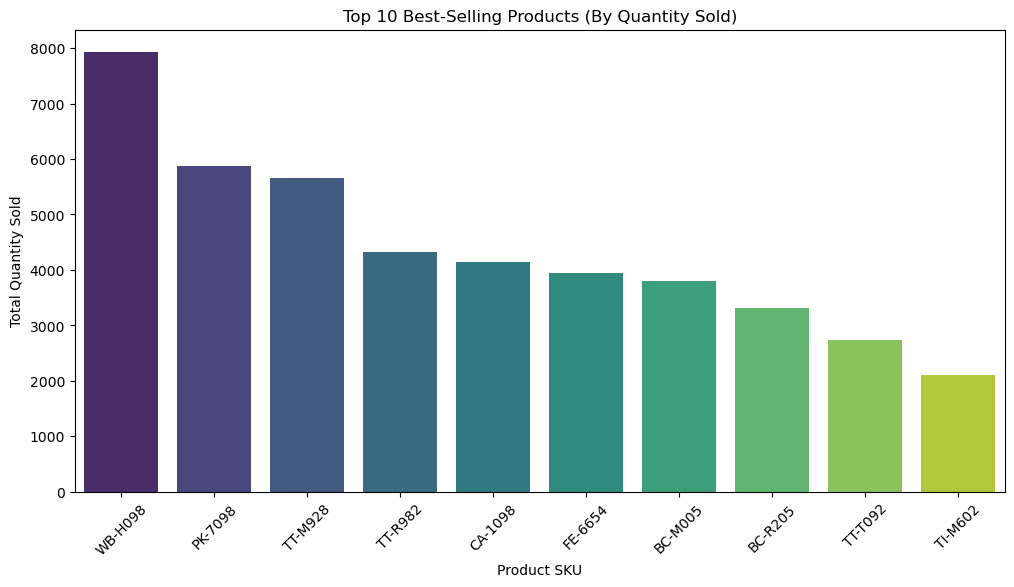

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products_qty.index, y=top_products_qty['total_quantity'], palette='viridis')
plt.title('Top 10 Best-Selling Products (By Quantity Sold)')
plt.xlabel('Product SKU')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [30]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df['Month'] = df['OrderDate'].dt.to_period('M')

monthly_trends = df.groupby(['Month', 'ProductSKU']).agg(
    monthly_quantity=('OrderQuantity', 'sum')
).reset_index()


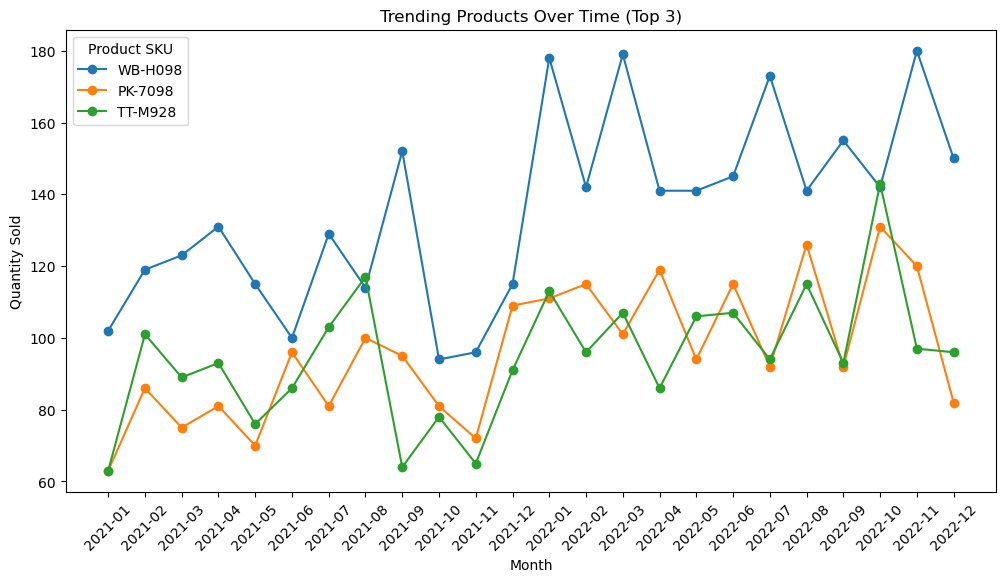

In [32]:
top_3_products = top_products_qty.index[:3]

plt.figure(figsize=(12,6))
for product in top_3_products:
    temp_data = monthly_trends[monthly_trends['ProductSKU'] == product]
    plt.plot(temp_data['Month'].astype(str), temp_data['monthly_quantity'], marker='o', label=product)

plt.title('Trending Products Over Time (Top 3)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product SKU')
plt.show()

## Key Findings (Week 2 — Day 2: Best Sellers & Trends)

- The top-selling product by quantity is **WB-H098** with 7,936 units sold.
- Premium products like **FE-6654** and **TI-M602** contribute significantly to revenue despite lower volumes.
- Products **PK-7098** and **TT-M928** show strong volumes but relatively moderate revenue — indicating high-frequency, low-cost products.
- Trend analysis reveals steady growth for **WB-H098** and seasonal fluctuations in **PK-7098**.
- Opportunity exists for targeted marketing of premium products and bundling them with high-volume accessories.